[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/corazzon/boostcourse-ds-510/blob/master/k-beauty-oversea-online-sale-output.ipynb)

## 국가(대륙)별/상품군별 온라인쇼핑 해외직접판매액
* 국가통계포털 : http://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1KE10081&vw_cd=MT_ZTITLE&list_id=JF&seqNo=&lang_mode=ko&language=kor&obj_var_id=&itm_id=&conn_path=MT_ZTITLE

### K-Beauty는 성장하고 있을까? 해외 직접판매를 한다면 어느 국가로 판매전략을 세우면 좋을까?
* K-Beauty란? [K-Beauty - Wikipedia](https://en.wikipedia.org/wiki/K-Beauty)
* e : 추정치, p : 잠정치, - : 자료없음, ... : 미상자료, x : 비밀보호, ▽ : 시계열 불연 ( 단위 : 백만원 )

## 필요 라이브러리 가져오기

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 한글폰트 설정
* https://github.com/ychoi-kr/koreanize-matplotlib

In [ ]:
# 한글폰트 사용을 위해 설치
# 아래 모듈을 설치하고 불러오면 별도의 한글폰트 설정이 필요 없습니다.
# colab 에서는 아래 모듈을 설치하고 불러와서 사용하세요. 

# !pip install koreanize-matplotlib

# import koreanize_matplotlib

In [27]:
# os 별로 폰트를 다르게 설정해 줍니다.
def get_font_by_os():

    import platform

    os_str = platform.system()

    if os_str.casefold() == "windows":
        font_family = "Malgun Gothic"
    else: #MacOS
        font_family = "AppleGothic"
    
    return font_family

plt.rc("font", family=get_font_by_os())
plt.rc("axes", unicode_minus=False)

# 레티나 설정을 해주면 글씨가 좀 더 선명하게 보입니다.
# 폰트의 주변이 흐릿하게 보이는 것을 방지합니다.
%config InlineBackend.figure_format = 'retina'

In [3]:
get_font_by_os()

'Malgul Gothic'

## 데이터 로드하기

In [7]:
from glob import glob

file_name = glob("./data/store/국가*.csv")[0]
file_name

'./data/store\\국가_대륙_별_상품군별_온라인쇼핑_해외직접판매액_20230428224141.csv'

In [8]:
# df_raw = pd.read_csv("data/국가_대륙_별_상품군별_온라인쇼핑_해외직접판매액_202002.csv", 
#                      encoding="cp949")
# df_raw = pd.read_csv("https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/online_oversea_sale.csv.zip", 
#                      encoding="cp949")
# df_raw.shape
df_raw = pd.read_csv(file_name, encoding="cp949")
df_raw.shape

(450, 27)

In [9]:
df_raw.columns

Index(['국가(대륙)별', '상품군별', '판매유형별', '2014.1/4', '2014.2/4', '2014.3/4',
       '2014.4/4', '2015.1/4', '2015.2/4', '2015.3/4', '2015.4/4', '2016.1/4',
       '2016.2/4', '2016.3/4', '2016.4/4', '2017.1/4', '2017.2/4', '2017.3/4',
       '2017.4/4', '2018.1/4', '2018.2/4', '2018.3/4', '2018.4/4', '2019.1/4',
       '2019.2/4', '2019.3/4', '2019.4/4'],
      dtype='object')

In [10]:
# "국가(대륙)별" 데이터 빈도수 세기
df_raw["국가(대륙)별"].value_counts()

합계            45
미국            45
중국            45
일본            45
아세안(ASEAN)    45
유럽연합(EU)      45
중동            45
중남미           45
대양주           45
기타            45
Name: 국가(대륙)별, dtype: int64

In [11]:
# 미국 데이터만 따로 보기
# df_raw[df_raw["국가(대륙)별"].str.contains("미국")]
df_raw[df_raw["국가(대륙)별"] == "미국"].head()

,국가(대륙)별,상품군별,판매유형별,2014.1/4,2014.2/4,2014.3/4,2014.4/4,2015.1/4,2015.2/4,2015.3/4,...,2017.3/4,2017.4/4,2018.1/4,2018.2/4,2018.3/4,2018.4/4,2019.1/4,2019.2/4,2019.3/4,2019.4/4
45,미국,합계,계,25773,22573,21288,26729,39945,26654,28647,...,42331,53209,42679,40207,37631,48978,40985,44973,55512,54054
46,미국,합계,면세점,-,-,-,-,-,-,-,...,9469,12177,5184,3603,2317,2079,2657,2951,1818,1481
47,미국,합계,면세점 이외,-,-,-,-,-,-,-,...,32862,41032,37495,36604,35314,46899,38328,42022,53694,52573
48,미국,컴퓨터 및 주변기기,계,2216,1666,1776,1675,1469,1393,2166,...,802,854,2033,1553,1784,1774,1298,1408,1653,1383
49,미국,컴퓨터 및 주변기기,면세점,-,-,-,-,-,-,-,...,0,0,0,0,0,1,0,0,0,0


## 분석과 시각화를 위한 tidy data 만들기
* https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

In [12]:
# df_raw.columns

Index(['국가(대륙)별', '상품군별', '판매유형별', '2014.1/4', '2014.2/4', '2014.3/4',
       '2014.4/4', '2015.1/4', '2015.2/4', '2015.3/4', '2015.4/4', '2016.1/4',
       '2016.2/4', '2016.3/4', '2016.4/4', '2017.1/4', '2017.2/4', '2017.3/4',
       '2017.4/4', '2018.1/4', '2018.2/4', '2018.3/4', '2018.4/4', '2019.1/4',
       '2019.2/4', '2019.3/4', '2019.4/4'],
      dtype='object')

In [13]:
#df_raw.melt(["국가(대륙)별", "상품군별", "판매유형별"])
df = df_raw.melt(["국가(대륙)별", "상품군별", "판매유형별"], var_name="기간", value_name="판매액(백만원)")
df.shape

(10800, 5)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10800 entries, 0 to 10799
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   국가(대륙)별   10800 non-null  object
 1   상품군별      10800 non-null  object
 2   판매유형별     10800 non-null  object
 3   기간        10800 non-null  object
 4   판매액(백만원)  10800 non-null  object
dtypes: object(5)
memory usage: 422.0+ KB


## 데이터 전처리
### 기간에서 연도를 분리하기

In [35]:
# df.iloc[0, 3]

'2014.1/4'

In [51]:
# int('2014.1/4'.split(".")[0])

2014

In [15]:
# df["연도"]
# df["연도"] = df["기간"].str.split(".",expand=True).iloc[:, 0].astype(int)
df["연도"] = df["기간"].map(lambda x: int(x.split(".")[0]))
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,판매액(백만원),연도
0,합계,합계,계,2014.1/4,148272,2014
1,합계,합계,면세점,2014.1/4,-,2014
2,합계,합계,면세점 이외,2014.1/4,-,2014
3,합계,컴퓨터 및 주변기기,계,2014.1/4,4915,2014
4,합계,컴퓨터 및 주변기기,면세점,2014.1/4,-,2014


In [61]:
# int('2014.4/4'.split(".")[1].split("/")[0])

4

In [16]:
# df["분기"]
df["분기"] = df["기간"].map(lambda x: int(x.split(".")[1].split("/")[0]))
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,판매액(백만원),연도,분기
0,합계,합계,계,2014.1/4,148272,2014,1
1,합계,합계,면세점,2014.1/4,-,2014,1
2,합계,합계,면세점 이외,2014.1/4,-,2014,1
3,합계,컴퓨터 및 주변기기,계,2014.1/4,4915,2014,1
4,합계,컴퓨터 및 주변기기,면세점,2014.1/4,-,2014,1


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10800 entries, 0 to 10799
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   국가(대륙)별   10800 non-null  object 
 1   상품군별      10800 non-null  object 
 2   판매유형별     10800 non-null  object 
 3   기간        10800 non-null  object 
 4   판매액(백만원)  7200 non-null   float64
 5   연도        10800 non-null  int64  
 6   분기        10800 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 590.8+ KB


### 금액을 수치데이터로 표현하기 위해 데이터 타입 변경하기

In [18]:
# df["million"]
df["판매액(백만원)"] = df["판매액(백만원)"].replace("-", np.nan).astype(float)
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,판매액(백만원),연도,분기
0,합계,합계,계,2014.1/4,148272.0,2014,1
1,합계,합계,면세점,2014.1/4,NaN,2014,1
2,합계,합계,면세점 이외,2014.1/4,NaN,2014,1
3,합계,컴퓨터 및 주변기기,계,2014.1/4,4915.0,2014,1
4,합계,컴퓨터 및 주변기기,면세점,2014.1/4,NaN,2014,1


### 필요없는 데이터 제거하기

In [20]:
# 합계 데이터는 따로 구할 수 있기 때문에 전체 데이터에서 제거합니다.
# df["국가(대륙)별"] != "합계"
# df["상품군별"] != "합계"
# df["판매유형별"] != "계"
df = df[~((df["국가(대륙)별"] == "합계") | (df["상품군별"] == "합계"))]

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9072 entries, 48 to 10799
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   국가(대륙)별   9072 non-null   object 
 1   상품군별      9072 non-null   object 
 2   판매유형별     9072 non-null   object 
 3   기간        9072 non-null   object 
 4   판매액(백만원)  6048 non-null   float64
 5   연도        9072 non-null   int64  
 6   분기        9072 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 567.0+ KB


In [22]:
df.isna().sum()

국가(대륙)별        0
상품군별           0
판매유형별          0
기간             0
판매액(백만원)    3024
연도             0
분기             0
dtype: int64

## K-Beauty 시각화
### 전체 상품군 판매액

In [23]:
df_total = df[df["판매유형별"].str.contains("계")].copy()
df_total.head()

,국가(대륙)별,상품군별,판매유형별,기간,판매액(백만원),연도,분기
48,미국,컴퓨터 및 주변기기,계,2014.1/4,2216.0,2014,1
51,미국,가전·전자·통신기기,계,2014.1/4,2875.0,2014,1
54,미국,소프트웨어,계,2014.1/4,47.0,2014,1
57,미국,서 적,계,2014.1/4,962.0,2014,1
60,미국,사무·문구,계,2014.1/4,25.0,2014,1


<Axes: xlabel='상품군별', ylabel='판매액(백만원)'>

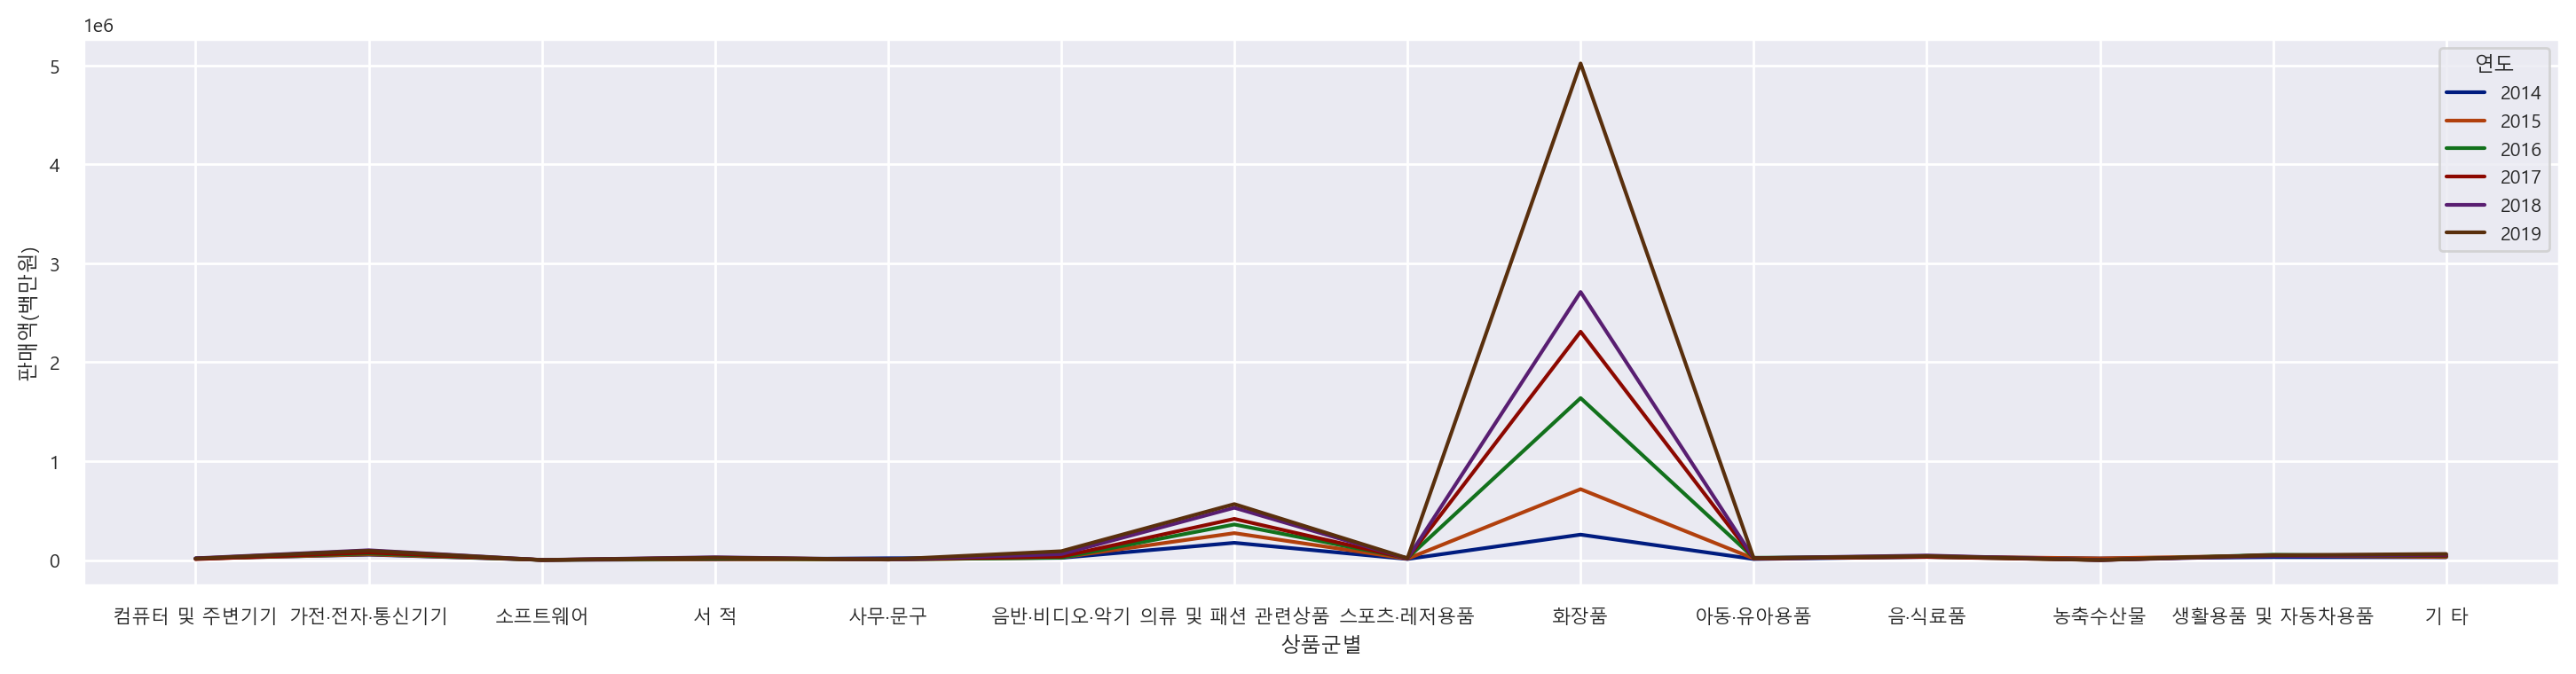

In [37]:
plt.figure(figsize=(18, 4))
sns.set(font_scale=0.7, font="Malgun Gothic")
sns.lineplot(df_total,
             x="상품군별",
             y="판매액(백만원)",
             hue="연도",
             palette="dark",
             estimator=np.sum,
             errorbar=None)

<Axes: xlabel='상품군별', ylabel='판매액(백만원)'>

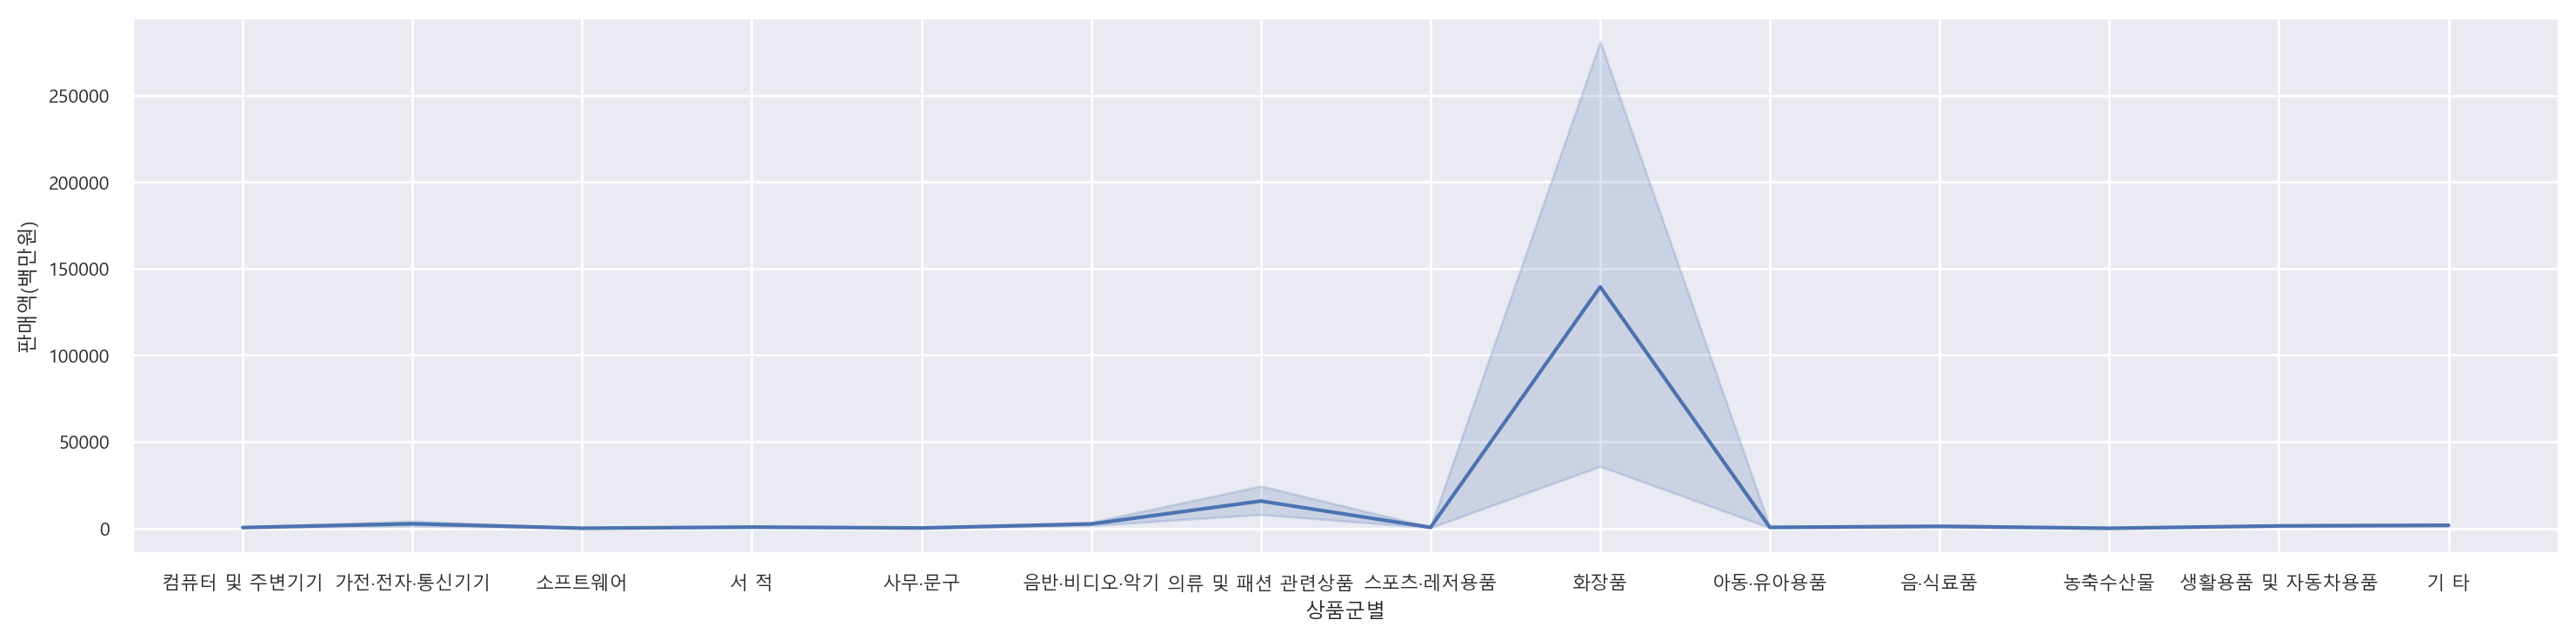

In [38]:
plt.figure(figsize=(18, 4))
sns.set(font_scale=0.7, font="Malgun Gothic")
sns.lineplot(df_total[df_total["연도"] == 2019],
             x="상품군별",
             y="판매액(백만원)")

In [ ]:
# df_sub

In [ ]:
# sns.relplot


### 화장품의 온라인쇼핑 해외직접판매액

In [ ]:
# df_cosmetic

### 의류 및 패션관련 상품 온라인쇼핑 해외직접판매액

In [ ]:
# df_fashion 

### 데이터 집계하기

### 연산결과를 시각적으로 보기

## 전체 상품군별로 온라인쇼핑 해외직접판매액은 증가했을까?

In [ ]:
plt.figure(figsize=(15, 4))


* lengend를 그래프의 밖에 그리기 : [matplotlib - Move legend outside figure in seaborn tsplot - Stack Overflow](https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot)

In [ ]:
plt.figure(figsize=(15, 4))
